In [1]:
import numpy as np
import os
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [2]:
reid_embeddings = dict()

In [7]:
for object_id in os.listdir("reid_embeddings"):
    for frame_id in os.listdir(f"reid_embeddings/{object_id}"):
        if int(object_id) not in reid_embeddings:
            reid_embeddings[int(object_id)] = list()
        reid_embeddings[int(object_id)].append(np.loadtxt(f"reid_embeddings/{object_id}/{frame_id}", delimiter=","))

In [8]:
# calculate average embedding similarity for each object

avg_similarities = dict()

for object_id, embeddings in reid_embeddings.items():
    if len(embeddings) < 5:
        continue
    embeddings = np.array(embeddings)
    similarity = cosine_similarity(embeddings)
    avg_similarity = np.mean(similarity[similarity != 1])
    avg_similarities[object_id] = avg_similarity

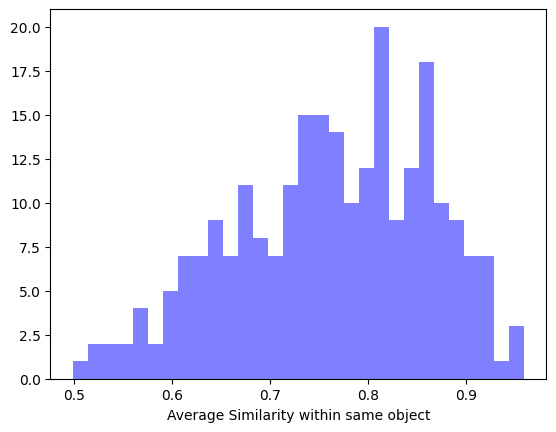

In [10]:
_ = plt.hist(avg_similarities.values(), bins=30, alpha=0.5, color='blue')
_ = plt.xlabel('Average Similarity within same object')

In [17]:
all_embeddings = list()
object_id_index_mapping = dict()

for object_id, embeddings in reid_embeddings.items():
    if len(embeddings) < 10:
        continue
    for i in range(len(embeddings)):
        object_id_index_mapping[len(all_embeddings)+i] = object_id
    all_embeddings.extend(embeddings)

all_embeddings = np.array(all_embeddings)

In [ ]:
top_matches = dict()

for idx, embedding in enumerate(all_embeddings):
    object_id = object_id_index_mapping[idx]
    cnt_embeddings = len(reid_embeddings[object_id])
    sims = cosine_similarity([embedding], all_embeddings)
    top_K = np.argsort(sims[0])[::-1][:cnt_embeddings]

    cnt = 0
    for val in top_K:
        if idx <= val < idx + cnt_embeddings:
            cnt += 1

    if object_id not in top_matches:
        top_matches[object_id] = list()
    
    top_matches[object_id].append(cnt / cnt_embeddings)

top_matches = {k: np.mean(v) for k, v in top_matches.items()}

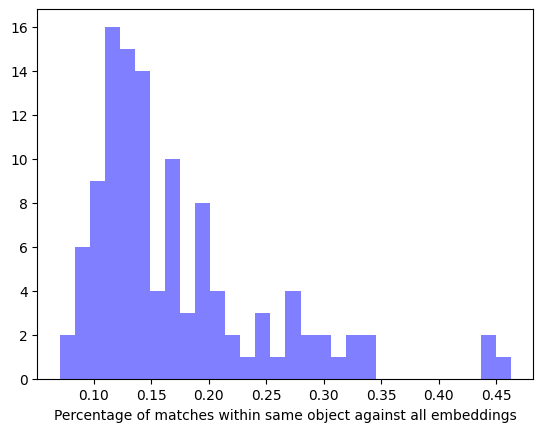

In [34]:
_ = plt.hist(top_matches.values(), bins=30, alpha=0.5, color='blue')
_  =  plt.xlabel('Percentage of matches within same object against all embeddings')